In [4]:
import numpy as np
import matplotlib.pyplot as plt

import agnlab.models as models

In [5]:
path_to_folder='testfit/'
models.init_lines_csv(wmin=4000, wmax=8000, dirpath=path_to_folder)

In [6]:
# Create a model
m = models.GaussEmLine(name='line', pos=5200, amp=5, fwhm=1000, offs_kms=1000)
m

<GaussEmLine model instance 'line'>

In [7]:
m_lorentz = models.LorentzEmLine(name='line', pos=5200, amp=5, fwhm=1000, offs_kms=1000)
m_lorentz

<LorentzEmLine model instance 'line'>

In [8]:
m_voigt = models.VoigtEmLine(name='line', pos=5200, amp=5, fwhm_g=1000, fwhm_l=1000, offs_kms=1000)
m_voigt

<VoigtEmLine model instance 'line'>

In [9]:
manylines = models.TiedGaussLines(['hydrogen.csv'], name='Test',
                                         fwhm=1000, min_fwhm=500, max_fwhm=8000,
                                         offs_kms=-360., min_offset=-1000, max_offset=1000,
                                         amp=1, min_amp=0, max_amp=1000)
manylines

<TiedGaussLines model instance 'Test'>

In [10]:
manylines_lorentz = models.TiedLorentzLines(['hydrogen.csv'], name='Test',
                                         fwhm=1000, min_fwhm=500, max_fwhm=8000,
                                         offs_kms=-360., min_offset=-1000, max_offset=1000,
                                         amp=1, min_amp=0, max_amp=1000)
manylines_lorentz

<TiedLorentzLines model instance 'Test'>

In [11]:
manylines_voigt = models.TiedVoigtLines(['hydrogen.csv'], name='Test',
                                         fwhm_g=1000, min_fwhm_g=1, max_fwhm_g=8000,
                                         fwhm_l=1000, min_fwhm_l=500, max_fwhm_l=8000,
                                         offs_kms=-360., min_offset=-1000, max_offset=1000,
                                         amp=1, min_amp=0, max_amp=1000)
manylines_voigt

<TiedVoigtLines model instance 'Test'>

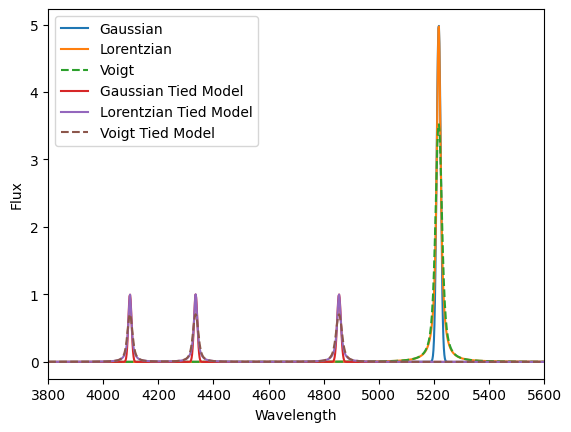

In [12]:
# Dummy data
wave = np.linspace(3800, 5600, 1000)

plt.figure()

plt.plot(wave, m(wave), label='Gaussian')
plt.plot(wave, m_lorentz(wave), label='Lorentzian')
plt.plot(wave, m_voigt(wave), label='Voigt', ls='--')

plt.plot(wave, manylines(wave), label='Gaussian Tied Model')
plt.plot(wave, manylines_lorentz(wave), label='Lorentzian Tied Model')
plt.plot(wave, manylines_voigt(wave), label='Voigt Tied Model', ls='--')

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.margins(x=0)
plt.legend()
plt.show()

In [13]:
fe_gauss = models.GaussFeII(name='FeII_Model',
                            fwhm=1200, min_fwhm=800, max_fwhm=3000,
                            offs_kms=0, min_offset=-3000, max_offset=3000)

fe_lorentz = models.LorentzFeII(name='FeII_Model',
                            fwhm=1200, min_fwhm=800, max_fwhm=3000,
                            offs_kms=0, min_offset=-3000, max_offset=3000)

fe_voigt = models.VoigtFeII(name='FeII_Model',
                                     fwhm_g=500, min_fwhm_g=1, max_fwhm_g=3000,
                                     fwhm_l=1200, min_fwhm_l=800, max_fwhm_l=3000,
                                     offs_kms=0, min_offset=-3000, max_offset=3000)

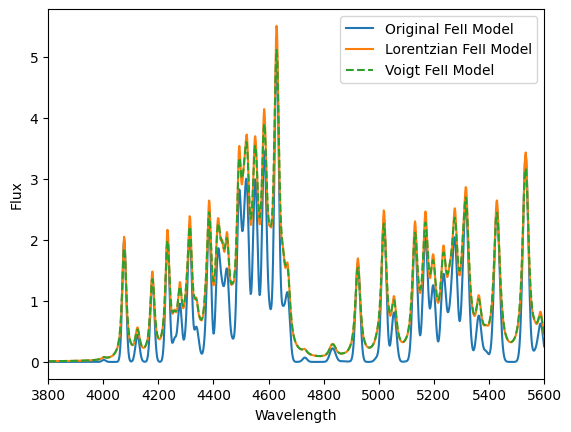

In [14]:
plt.figure()

plt.plot(wave, fe_gauss(wave), label='Original FeII Model')
plt.plot(wave, fe_lorentz(wave), label='Lorentzian FeII Model')
plt.plot(wave, fe_voigt(wave), label='Voigt FeII Model', ls='--')

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.margins(x=0)
plt.legend()
plt.show()

In [15]:
import shutil
shutil.rmtree(path_to_folder)